# Time Series Prepare Exercises

In [1]:
# tabular data manipulation
import numpy as np
import pandas as pd

# datetime utilities
####

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# our acquire script
import acquire as a
import prepare as p

The end result of this exercise should be a file named `prepare.py`

## Store Items Data

Using your store items data:

In [42]:
df = a.combined_df()

In [43]:
df = df.drop(columns=['item', 'store'])

In [44]:
df.head(1)

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


### 1.

Convert date column to datetime format.

In [45]:
df.sale_date = pd.to_datetime(df.sale_date)

In [46]:
df.head(1)

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,2013-01-01 00:00:00+00:00,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


### 2.

Plot the distribution of sale_amount and item_price.

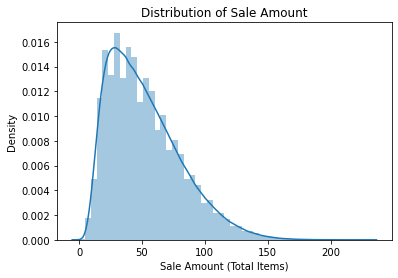

In [47]:
sns.distplot(df.sale_amount)
plt.title('Distribution of Sale Amount')
plt.xlabel('Sale Amount (Total Items)');

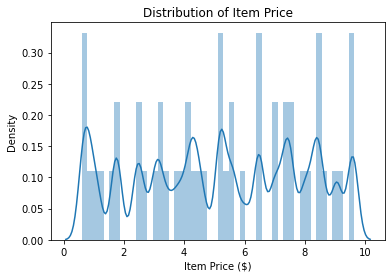

In [48]:
sns.distplot(df.item_price)
plt.title('Distribution of Item Price')
plt.xlabel('Item Price ($)');

### 3.

Set the index to be the datetime variable.

In [49]:
df = df.set_index('sale_date')

In [50]:
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


### 4.

Add a 'month' and 'day of week' column to your dataframe.

In [57]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [60]:
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday


### 5.

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [61]:
df['sales_total'] = df.sale_amount * df.item_price

In [64]:
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92


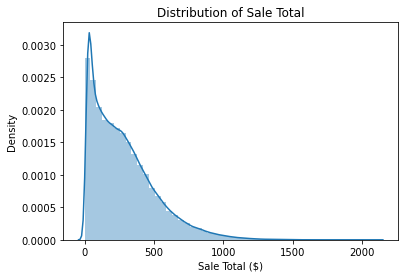

In [65]:
sns.distplot(df.sales_total)
plt.title('Distribution of Sale Total')
plt.xlabel('Sale Total ($)');

### 6.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [66]:
def clean_sales_data():
    '''
    Requires no inputs and returns cleaned sales data df
    '''
    df = a.combined_df() # call acquire function to get all data from API
    df = df.drop(columns=['item', 'store']) # drop redundant columns
    df.sale_date = pd.to_datetime(df.sale_date) # convert data column into datetime dtype
    df = df.set_index('sale_date') # set data column as index
    df['month'] = df.index.month_name() # add month name column
    df['day_of_week'] = df.index.day_name() # add day name column
    df['sales_total'] = df.sale_amount * df.item_price # add total sale amount column
    return df

In [69]:
# # run it calling function from notebook
# df = clean_sales_data()
# df.head(1)

In [74]:
# # run it using imported module
# df = p.clean_sales_data()
# df.head()

In [5]:
# write a function to cache it since it takes a minute to run
df = p.get_clean_sales_data()
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92


## OPS Data

Using the OPS data acquired in the Acquire exercises `opsd_germany_daily.csv`, complete the following:

In [6]:
df = a.get_power()

In [7]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [13]:
type(df.Date[0])

str

In [29]:
df.shape

(4383, 6)

### 1.

Convert date column to datetime format.

In [15]:
df.Date = pd.to_datetime(df.Date)

### 2.

Plot the distribution of each of your variables.

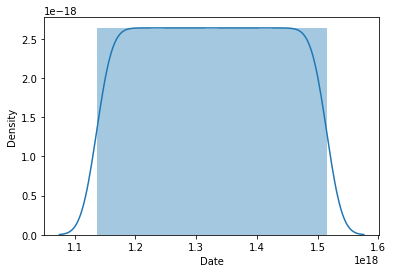

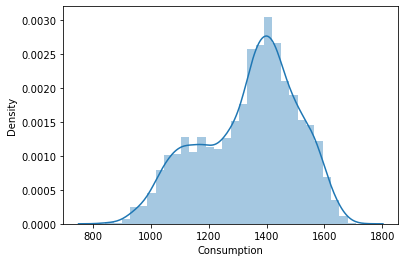

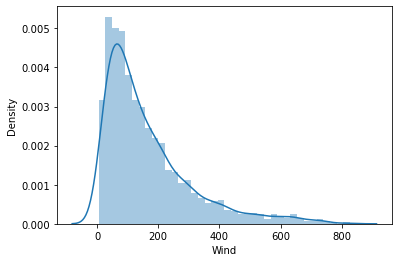

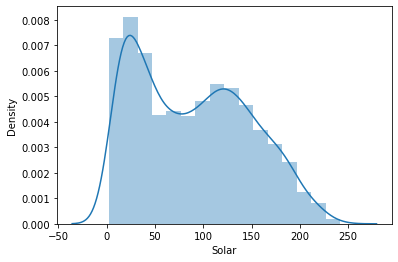

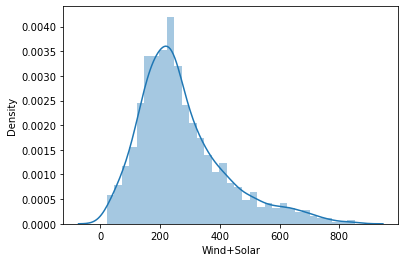

In [20]:
for col in df.columns:
    sns.distplot(df[col])
    plt.show()

### 3.

Set the index to be the datetime variable.

In [22]:
df = df.set_index('Date')

### 4.

Add a month and a year column to your dataframe.

In [30]:
df['month'] = df.index.month_name()
df['year'] = df.index.year
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


### 5.

Fill any missing values.

In [28]:
df.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [31]:
df.Wind.mean()

164.8141726027395

In [32]:
df.Wind.median()

119.09799999999998

In [46]:
df[np.isnan(df.Wind) == False]

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2010-01-01,1057.37200,48.709,NaN,NaN,January,2010
2010-01-02,1161.04200,24.628,NaN,NaN,January,2010
2010-01-03,1132.06900,22.963,NaN,NaN,January,2010
2010-01-04,1346.25000,59.318,NaN,NaN,January,2010
2010-01-05,1457.37400,41.624,NaN,NaN,January,2010
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


In [ ]:
np.is

In [39]:
type(np.NaN)

float

In [45]:
np.isnan(df.Wind) == False

Date
2006-01-01    False
2006-01-02    False
2006-01-03    False
2006-01-04    False
2006-01-05    False
              ...  
2017-12-27     True
2017-12-28     True
2017-12-29     True
2017-12-30     True
2017-12-31     True
Name: Wind, Length: 4383, dtype: bool

### 6.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.